In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt

In [3]:
def hopp_vec(Mx,My,vec,px,py):
    '''generates MxM on-slice hopping_matg matrix cubic lattice
     vec= hopping vector
     py=1 PBC along y otherwise OBC
     px=1 PBC along x otherwise OBC
    ''' 
    
    hopping_mat=np.zeros(shape=(Mx*My,Mx*My),dtype=complex)
    for i_y in range(My):
        for i_x in range(Mx):
            i_px=i_x+vec[0]
            i_py=i_y+vec[1]
            if ((i_px>=Mx or i_px<0) and i_py< My and i_py>=0):
                if i_px>=Mx :
                    hx=px
                else:
                    hx=px.conjugate()
                i_px=i_px%Mx
                hopping_mat[i_px+i_py*Mx,i_x+i_y*Mx]=hx
            elif ((i_py>=My or i_py<0) and i_px< Mx and i_px>=0):
                if i_py>=My :
                    hy=py
                else:
                    hy=py.conjugate()
                    
                i_py=i_py%My
                hopping_mat[i_px+i_py*Mx,i_x+i_y*Mx]=hy
                    
            elif (i_px>=Mx or i_px<0) and (i_py>=My or i_py<0):
                if i_px>=Mx:
                    hx=px
                else:
                    hx=px.conjugate()
    
                if i_py>=My:
                    hy=py
                else:
                    hy=py.conjugate()
                i_px=i_px%Mx
                i_py=i_py%My
                hopping_mat[i_px+i_py*Mx,i_x+i_y*Mx]=hx*hy
                
            elif i_px>=0 and i_px<Mx and i_py>=0 and i_py<My :
                hopping_mat[i_px+i_py*Mx,i_x+i_y*Mx]=1
    return hopping_mat

def wf_gen(Mx,My,N_pt,r,t,m,px,py):
    '''
    returns eigenvalues and eigenvectors of pi-flux model
    Mx x My sites on a square lattice
    N_pt: total number of particles (choose half filling for insulating phase)
    t: nearest neighbor hopping
    r: next nearest neighbor hopping (delta in arXiv:1412.5597 notation)
    m: onsite +/- potential
    px: complex phase of hopping across vertical edge
    py: complex phase of hopping across horizontal edge    
    '''
    tx=t
    ty=t    
    x_sign=np.diag(np.power(-1,np.mod(np.arange(0,Mx*My),Mx)))
    y_sign=np.diag(np.power(-1,np.floor(np.arange(0,Mx*My)/Mx)))
    H_x=tx*hopp_vec(Mx,My,[1,0],px,py)
    H_y=ty*np.dot(x_sign,hopp_vec(Mx,My,[0,1],px,py))
    H_xy_nn=-1j*r*np.dot(x_sign,hopp_vec(Mx,My,[1,1],px,py))
    H_Mxy_nn=1j*r*np.dot(x_sign,hopp_vec(Mx,My,[-1,1],px,py))
    H_dd=m*np.dot(y_sign,x_sign)  
    H_t=H_x+H_y+H_xy_nn+H_Mxy_nn
    H_t=H_t+np.transpose(H_t.conjugate())+H_dd      
    evals,evecs=np.linalg.eigh(H_t)
    evals=evals.real
    evecs=evecs[:,evals.argsort()]
    evals.sort()
    evecs=evecs[:,0:N_pt]
    evals=evals[0:N_pt]
    return evals,evecs


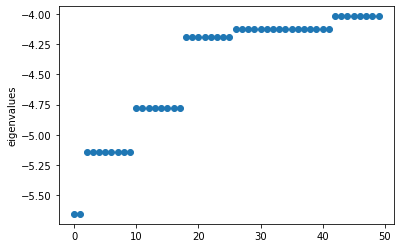

In [9]:
### system dims
Lx= 10
Ly= 10
### bdy conditions
px=1
py=1
N_pt = int(Lx*Ly/2) # number of particles
### hopping parameters
t = 2
r = 1
m = 0

evals, evecs= wf_gen(Lx,Ly,N_pt,r,t,m,px,py)

plt.figure()
plt.plot(evals,'o')
plt.ylabel('eigenvalues')
plt.show()

